In [8]:
import logging
import os
import sys
import gym
import matplotlib.pyplot as plt
from gym.envs.mujoco.humanoid import HumanoidEnv

In [9]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
from src.init_qpos_modifer import InitQposModifierFactory, InitQposModifier

In [2]:
FORMAT = '%(asctime)s: %(message)s'
logging.basicConfig(format=FORMAT, stream=sys.stdout, level=logging.INFO)

In [3]:
class ParametrizableResetHumanoid(HumanoidEnv):
    def __init__(self):
        super().__init__()

        qpos_modifier = InitQposModifierFactory.get_default()
        logging.info(f"Modifying Humanoid init_qpot using {qpos_modifier}")
        self.init_qpos = qpos_modifier.modify_init_qpos(self.init_qpos)

In [4]:
class NewInitQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 5
        value = 0.1
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [5]:
new_env_name = 'ParametrizableResetHumanoid-v2'

gym.envs.register(
    id=new_env_name,
    entry_point=ParametrizableResetHumanoid,
    max_episode_steps=1000,
)
logging.info(f"Registered new environment: {new_env_name}")

2022-03-31 18:08:56,806: Registered new environment: ParametrizableResetHumanoid-v2


In [6]:
name_of_InitQposModifier = "new_modifier"

InitQposModifierFactory.register(name_of_InitQposModifier, NewInitQposModifier)
logging.info(f"Registered new QPosModifier - name: {name_of_InitQposModifier} class - {NewInitQposModifier}")

os.environ["DEFAULT_InitQposModifier"] = name_of_InitQposModifier
logging.info(f"Set env variable DEFAULT_InitQposModifier={name_of_InitQposModifier}")

2022-03-31 18:08:56,816: Registered new QPosModifier - name: new_modifier class - <class '__main__.NewInitQposModifier'>
2022-03-31 18:08:56,817: Set env variable DEFAULT_InitQposModifier=new_modifier


2022-03-31 18:08:56,847: Modifying Humanoid init_qpot using <__main__.NewInitQposModifier object at 0x7f7ee5b1bcd0>
2022-03-31 18:08:56,848: init_qpos[5] = 0.1


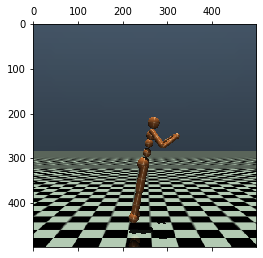

In [7]:
env = gym.make(new_env_name)
observation = env.reset()

first_frame = env.render(mode='rgb_array')
        
env.close()
plt.matshow(first_frame)